# $$IPL Analysis and Prediction$$ 

---

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 12,6

In [2]:
data = pd.read_csv('E://Desktop//IPL Analysis//matches.csv')

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [8]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
data.drop('umpire3', axis = 1, inplace  =True)

In [11]:
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [13]:
data.shape

(743, 17)

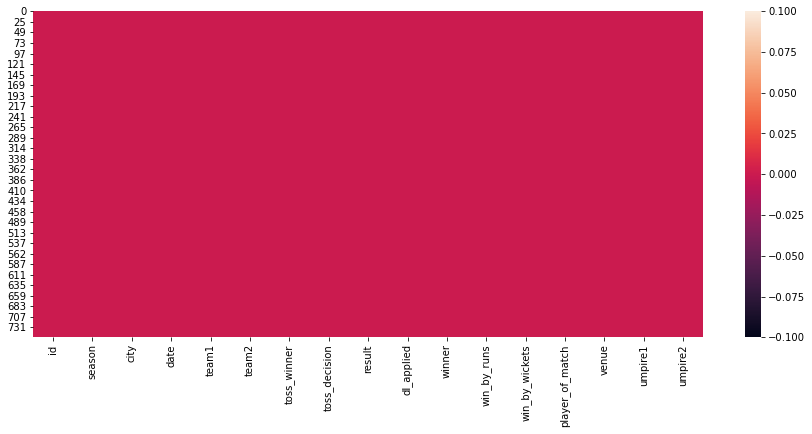

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isnull())
plt.show()

In [15]:
Teams_per_season = data.groupby('season')['winner'].value_counts()
Teams_per_season.head(20)

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
Name: winner, dtype: int64

In [16]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in Teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 11)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [17]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,11
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


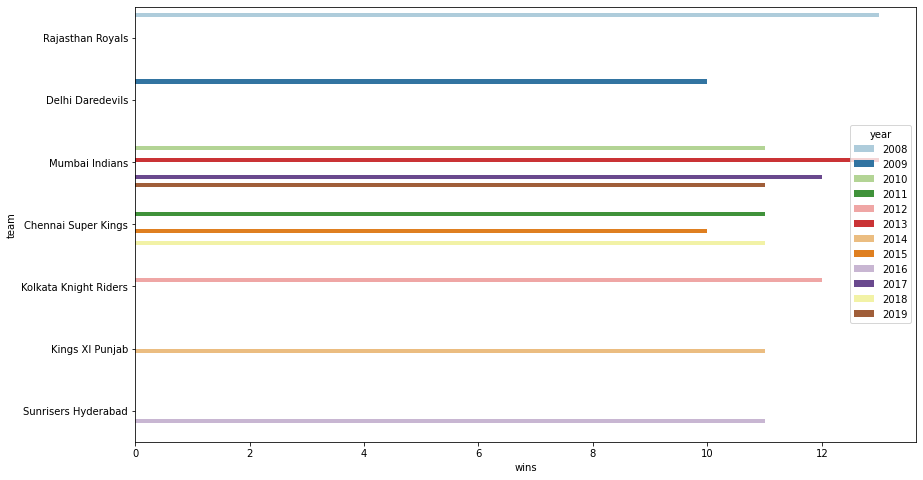

In [18]:
plt.figure(figsize=(14,8))
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired')
plt.show()

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

**Observations:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).**

# The venue that hosted the maximum number of matches

In [19]:
venue_ser = data['venue'].value_counts()
venue_ser.head()

Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        70
Feroz Shah Kotla                             66
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

In [20]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

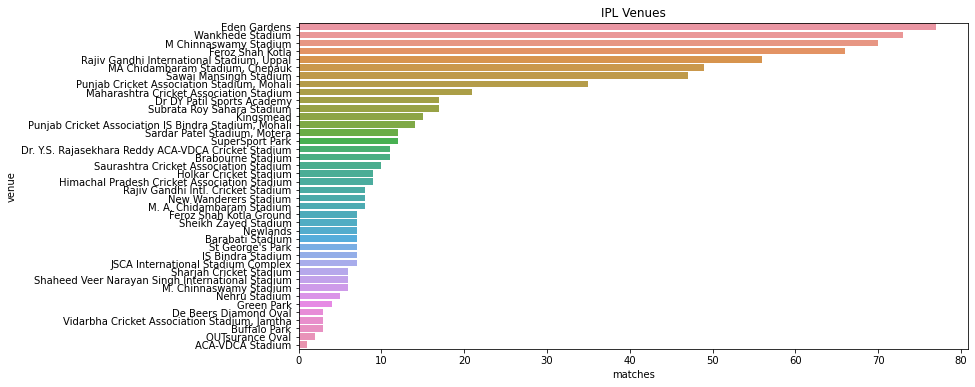

In [21]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

# The most successful IPL team:

In [22]:
team_wins_ser = data['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
    
team_wins_df.head()

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,98
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,82
4,Kings XI Punjab,81


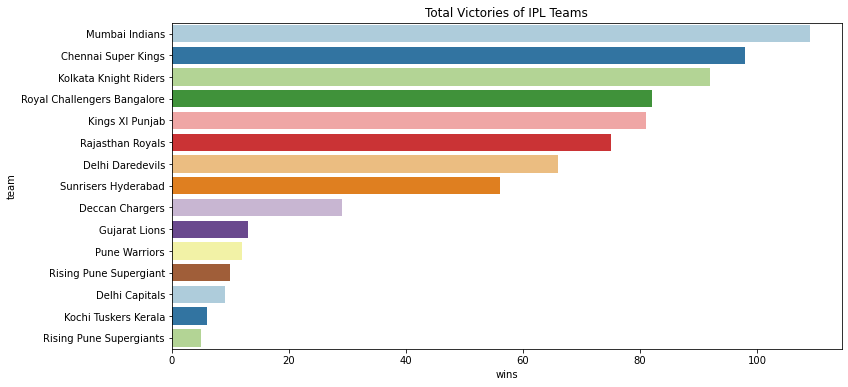

In [23]:

plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

# Most Valuable Player will be ----

In [24]:
mvp_ser = data['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1  
mvp_ten_df.head()

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17


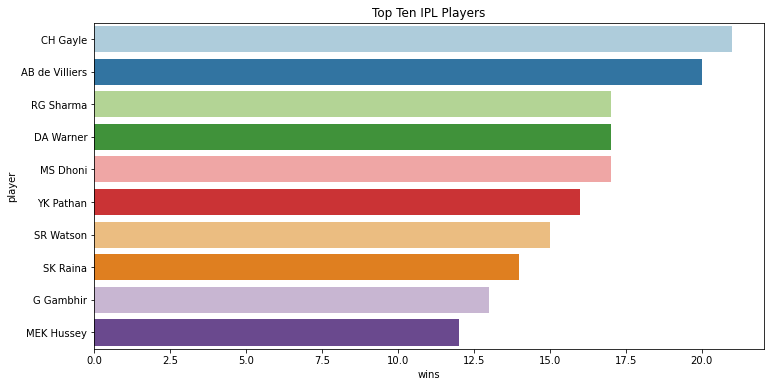

In [25]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

In [26]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [27]:
dataset = pd.read_csv('E://Desktop//IPL Analysis//IPL_Data.csv')

In [28]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [30]:
dataset.shape

(76014, 15)

In [31]:
dataset.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [32]:
dataset.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [33]:
X = dataset.loc[:,['runs', 'wickets', 'overs', 'striker','non-striker']].values 
y = dataset.loc[:, "total"].values 

In [34]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [37]:
lin_pred = lin_model.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual_Score':y_test, 'Predicted_Score':lin_pred})

In [39]:
df.head(8)

,Actual_Score,Predicted_Score
0,145,156.085845
1,205,208.641188
2,175,158.673190
3,142,135.148884
4,212,158.960338
5,132,140.360065
6,175,168.333917
7,181,180.650441


In [40]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lin_model,X_train, y_train).mean()*100)

50.39051283990309


In [41]:
def Custom_Accuracy(y_test,y_pred,thresold):
    right = 0
    m = len(y_pred)
    for i in range(0,m):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/m)*100)


y_pred = lin_model.predict(X_test)
score = lin_model.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , Custom_Accuracy(y_test,y_pred,20))

R-squared value: 51.062228450413826
Custom accuracy: 73.70027362660493


# Applying Random Forest Algorithm

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf_model = RandomForestRegressor(n_estimators=100, max_features=None)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [44]:
rf_pred = rf_model.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual_Score_rf':y_test,'Predicted_Score_rf':rf_pred})

In [46]:
df.head(8)

,Actual_Score_rf,Predicted_Score_rf
0,145,144.960000
1,205,212.910000
2,175,167.070000
3,142,140.240000
4,212,161.359988
5,132,139.800000
6,175,175.570000
7,181,181.260000


In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_model,X_train,y_train).mean()*100)

64.69907157808998


In [48]:
def Custom_Accuracy_rf(y_test, y_pred,threshold):
    right = 0
    m = len(y_pred)
    for i in range(0,m):
        if(abs(y_pred[i] - y_test[i])) <=threshold:
            right += 1
    return(right/m*100)


y_pred = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
print('R Squared =', score*100)
print('Custom Accuracy=',Custom_Accuracy_rf(y_test,y_pred,20))

R Squared = 68.00839372036641
Custom Accuracy= 83.94022311092402


# Performing Ridge regression

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge_regressor = Ridge(alpha= 0.1)

In [51]:
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.1)

In [52]:
ridge_pred = ridge_regressor.predict(X_test)

In [53]:
df = pd.DataFrame({'Actual_Score_Ridge':y_test,'Predicted_Score_Ridge':ridge_pred})

In [54]:
df.head(8)

,Actual_Score_Ridge,Predicted_Score_Ridge
0,145,156.086387
1,205,208.639419
2,175,158.673354
3,142,135.148999
4,212,158.960331
5,132,140.359965
6,175,168.333639
7,181,180.649244


In [55]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridge_regressor , X_train, y_train).mean()*100)

50.39051284655336


In [56]:
def Custom_Accuracy_Ridge(y_test , y_pred, Threshold):
    right = 0
    m = len(y_pred)
    for i in range(0,m):
        if(abs(y_pred[i] - y_test[i])) <= Threshold:
            right += 1
    return(right/m*100)

y_pred = ridge_regressor.predict(X_test)
score = ridge_regressor.score(X_test, y_test)
print('R Squared=', score*100)
print('Custom Accuracy=', Custom_Accuracy_Ridge(y_test,y_pred,20))

R Squared= 51.06223780990664
Custom Accuracy= 73.70027362660493


 **By Comparing Three Algorithms, Random Forest Algorthm is provide me good Accuracy as Compared to Linear Regression and Ridge Regression.** 



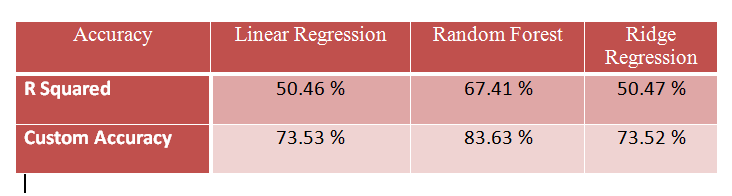

---

# Performing Time Series Analysis using FBProphet Algorithm

In [57]:
dataset.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [59]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mid             76014 non-null  int64         
 1   date            76014 non-null  datetime64[ns]
 2   venue           76014 non-null  object        
 3   bat_team        76014 non-null  object        
 4   bowl_team       76014 non-null  object        
 5   batsman         76014 non-null  object        
 6   bowler          76014 non-null  object        
 7   runs            76014 non-null  int64         
 8   wickets         76014 non-null  int64         
 9   overs           76014 non-null  float64       
 10  runs_last_5     76014 non-null  int64         
 11  wickets_last_5  76014 non-null  int64         
 12  striker         76014 non-null  int64         
 13  non-striker     76014 non-null  int64         
 14  total           76014 non-null  int64         
dtypes:

In [61]:
final_data = dataset.groupby('date').max()['total'].reset_index()

In [62]:
final_data.tail()

,date,total
437,2017-05-13,173
438,2017-05-14,161
439,2017-05-16,162
440,2017-05-19,107
441,2017-05-21,129


In [63]:
final_data.columns = ['ds','y']

In [64]:
final_data.tail()

,ds,y
437,2017-05-13,173
438,2017-05-14,161
439,2017-05-16,162
440,2017-05-19,107
441,2017-05-21,129


In [65]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      442 non-null    datetime64[ns]
 1   y       442 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.0 KB


In [66]:
final_data.describe()

,y
count,442.000000
mean,167.185520
std,29.026174
min,67.000000
25%,148.250000
50%,168.000000
75%,187.000000
max,263.000000


In [67]:
from fbprophet import Prophet

In [68]:
Prophet_forecast = Prophet(interval_width=0.98)
Prophet_forecast.fit(final_data)
future = Prophet_forecast.make_future_dataframe(periods =30)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
467,2017-06-16
468,2017-06-17
469,2017-06-18
470,2017-06-19
471,2017-06-20


In [69]:
forecast = Prophet_forecast.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
467,2017-06-16,228.994432,165.129766,293.884159
468,2017-06-17,241.325341,176.085724,306.864673
469,2017-06-18,237.384405,173.234370,299.597860
470,2017-06-19,230.108375,160.202274,295.875422
471,2017-06-20,238.136471,178.149125,302.495517


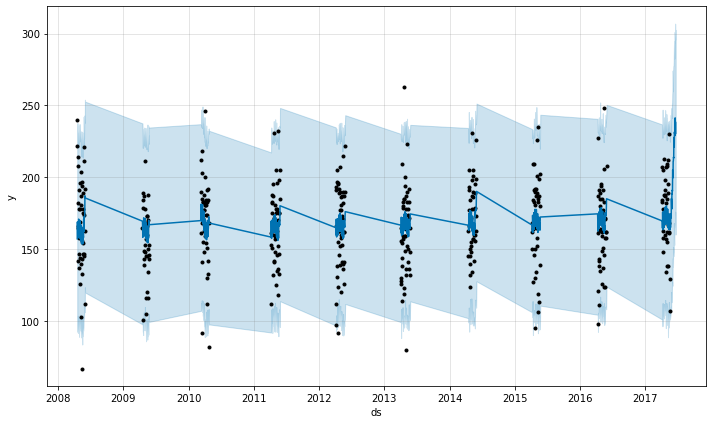

In [70]:
Prophet_forecast_plot = Prophet_forecast.plot(forecast)

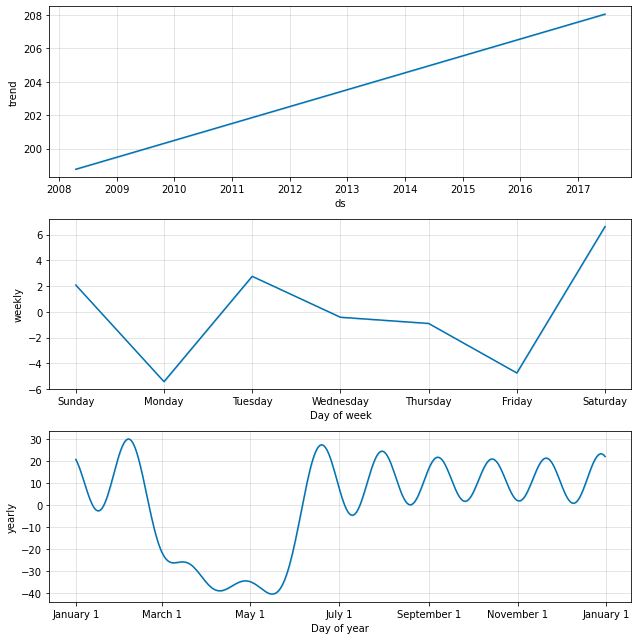

In [71]:
Prophet_forecast_components_plot = Prophet_forecast.plot_components(forecast)

In [72]:
from fbprophet.diagnostics import cross_validation
final_data_cv = cross_validation(Prophet_forecast ,initial='30 days',period='180 days', horizon='365 days')

INFO:fbprophet:Making 17 forecasts with cutoffs between 2008-07-02 00:00:00 and 2016-05-21 00:00:00


In [73]:
final_data_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
754,2017-05-13,173.045260,107.322125,237.260462,173,2016-05-21
755,2017-05-14,167.876220,99.807243,235.374644,161,2016-05-21
756,2017-05-16,168.550096,106.729432,234.584034,162,2016-05-21
757,2017-05-19,163.698803,94.121406,228.480496,107,2016-05-21
758,2017-05-21,171.440676,103.064511,237.566263,129,2016-05-21


In [74]:
from fbprophet.diagnostics import performance_metrics

In [75]:
df_p = performance_metrics(final_data_cv)

In [76]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,119 days,115078.790311,339.232649,221.449514,1.359365,0.310567,0.560000
1,120 days,119443.975680,345.606678,229.437013,1.415489,0.335841,0.546667
2,121 days,94098.915985,306.755466,194.587414,1.236654,0.276074,0.586667
3,122 days,68862.021888,262.415742,159.185557,0.993478,0.217971,0.640000
4,123 days,59833.668277,244.609215,141.669164,0.897460,0.208878,0.680000


---

# $$--- Thankyou !---$$

@Majeed Shaikh
---
Date: 13th February 2021